## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['get-pip.py', 'heart.csv', 'a', 'README.md', 'heart_disease_nbc.ipynb', '.gitignore', '.ipynb_checkpoints', '.git', 'test.ipynb']


In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
dataset.shape

(1025, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### Getting all the details like mean, standard deviation, minimum etc of the target variable

In [6]:
dataset['target'].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [7]:
dataset['target'].unique()

array([0, 1])

##### From the above result i.e dataset.unique() result, we can see that this is a classification problem. You should classify a datapoint as a 0 or 1.

## Correlations

In [8]:
print(dataset.corr()['target'].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


## Exploratory Data Analysis

1    526
0    499
Name: target, dtype: int64


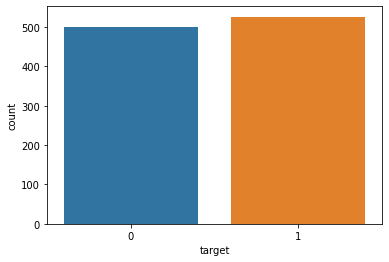

In [9]:
y = dataset['target']
sns.countplot(y)
target_temp = dataset.target.value_counts()
print(target_temp)

#### Analysing other columns like age, sex etc.

In [10]:
dataset["sex"].unique()

array([1, 0])

<AxesSubplot:xlabel='sex', ylabel='target'>

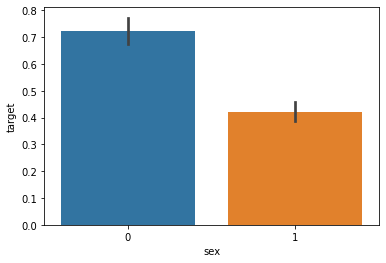

In [11]:
sns.barplot(dataset["sex"],y)

#### Through the above plot we can conclude that females are more likely to have heart problems when compared to males.

#### Next we analyze the chest pain type feature

In [12]:
dataset["cp"].unique()

array([0, 1, 2, 3])

<AxesSubplot:xlabel='cp', ylabel='target'>

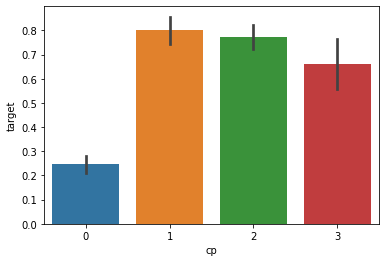

In [13]:
sns.barplot(dataset["cp"],y)

#### From the plot above we see that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the restecg feature

In [14]:
dataset["restecg"].unique()

array([1, 0, 2])

<AxesSubplot:xlabel='restecg', ylabel='target'>

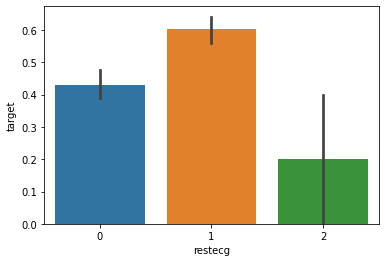

In [15]:
sns.barplot(dataset["restecg"],y)

#### From the above plot we see that people with restecg 0 and 1 are more likely to have a heart attack than the ones with restecg 2.

### Analyzing the slope feature

In [16]:
dataset["slope"].unique()

array([2, 0, 1])

<AxesSubplot:xlabel='slope', ylabel='target'>

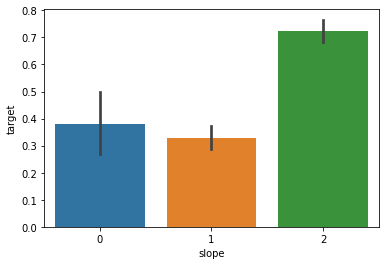

In [17]:
sns.barplot(dataset["slope"],y)

#### The graph above shows that the slope 2 causes heart pain much more than those with 1 and 0

### Analysing the exang feature

In [18]:
dataset["exang"].unique()

array([0, 1])

<AxesSubplot:xlabel='exang', ylabel='target'>

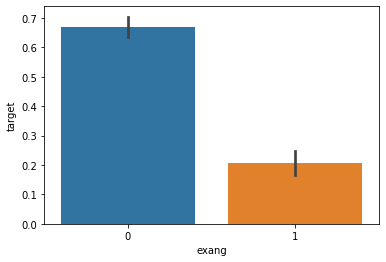

In [19]:
sns.barplot(dataset["exang"],y)

#### The exang value of 1 i.e exercise induced angina are less likely to suffer from a heart disease

### Analyzing the FBS feature

In [20]:
dataset["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [21]:
dataset["fbs"].unique()

array([0, 1])

<AxesSubplot:xlabel='fbs', ylabel='target'>

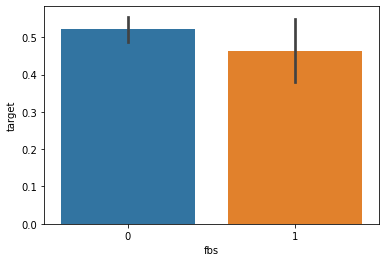

In [22]:
sns.barplot(dataset["fbs"],y)

#### The plot looks alike for fbs = 1 and fbs = 0. So, nothing can be said from here

### Analysing the tha1 feature

In [23]:
dataset["thal"].unique()

array([3, 2, 1, 0])

<AxesSubplot:xlabel='thal', ylabel='target'>

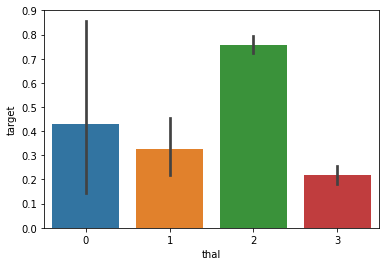

In [24]:
sns.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

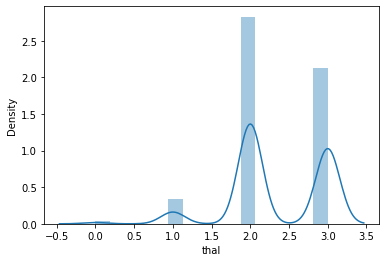

In [25]:
sns.distplot(dataset["thal"])

#### The value of tha1 = 2 indicates that the person is more likely to suffer from a heart disease

### Analysing the ca feature

In [26]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4])

<AxesSubplot:xlabel='ca', ylabel='count'>

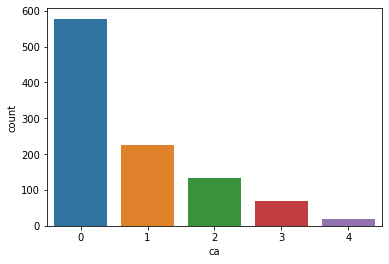

In [27]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

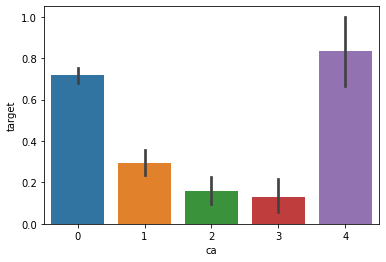

In [28]:
sns.barplot(dataset["ca"],y)

#### Patients with ca = 4 have a high risk of suffering from a heart disease

## Train - Test split

In [29]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [30]:
X_train.shape

(820, 13)

In [31]:
X_test.shape

(205, 13)

In [32]:
Y_train.shape

(820,)

In [33]:
Y_test.shape

(205,)

## Model Fitting

### Naive Bayes Classifer (NBC)

In [34]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [35]:
Y_pred_nb.shape

(205,)

In [36]:
from sklearn.metrics import accuracy_score
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


#### Printing confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred_nb)

array([[79, 19],
       [11, 96]])

## Implementation from scratch

In [38]:
import csv
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp
import warnings
import random
import math
       
def calc_prior_prob(X, c):
    cdataset = X[X['target'] == c]
    return cdataset.shape[0]/X.shape[0]

In [39]:
print(calc_prior_prob(dataset, 0))
print(calc_prior_prob(dataset, 1))

0.4868292682926829
0.5131707317073171


In [40]:
def posterior(X, x, c):
    cdataset = X[X['target'] == c]
    ans = 1.0
    columns = X.columns
    columns = np.delete(columns, -1)
    for col in columns:
        ans = ans * ((cdataset[cdataset[col] == x[col]]).shape[0]/cdataset.shape[0])
    return ans

In [41]:
def model(X):
    prior0 = calc_prior_prob(X, 0)
    prior1 = calc_prior_prob(X, 1)
    return np.array([prior0, prior1])

In [42]:
def postval(X, Y):
    pval = np.array([])
    for i in range(Y.shape[0]):
        pval = np.append(pval, posterior(X, Y.iloc[i], 0))
        pval = np.append(pval, posterior(X, Y.iloc[i], 1))
    return pval

In [43]:
def predict(Y, pr, pos):
    preds = np.array([])
    i = 0
    while i < 2*Y.shape[0]:
        p0 = pr[0] * pos[i]
        p1 = pr[1] * pos[i+1]
        if p0>p1: c = 0
        else: c = 1
        preds = np.append(preds, c)
        i = i+2
    return preds

In [44]:
training_data = dataset.sample(frac=0.8, random_state=25)
testing_data = dataset.drop(training_data.index)

In [45]:
m = model(training_data)

In [46]:
pval = postval(training_data, testing_data)

In [47]:
m

array([0.49146341, 0.50853659])

In [48]:
pval

array([7.18936352e-10, 0.00000000e+00, 7.74405177e-13, 4.13928505e-14,
       0.00000000e+00, 3.52779297e-13, 1.28551726e-11, 0.00000000e+00,
       0.00000000e+00, 1.64260862e-13, 8.40456359e-11, 0.00000000e+00,
       4.71792367e-14, 0.00000000e+00, 1.51179243e-10, 0.00000000e+00,
       0.00000000e+00, 1.01600438e-11, 5.25250426e-13, 8.72816569e-12,
       8.18790772e-13, 8.25565289e-12, 0.00000000e+00, 9.14961445e-10,
       1.90173536e-12, 0.00000000e+00, 0.00000000e+00, 1.30519789e-10,
       9.35339844e-12, 0.00000000e+00, 0.00000000e+00, 1.58203723e-09,
       3.92743429e-12, 1.45880519e-14, 0.00000000e+00, 4.69204074e-12,
       0.00000000e+00, 1.04004744e-11, 7.12427579e-12, 0.00000000e+00,
       5.66090535e-12, 0.00000000e+00, 5.77135761e-13, 0.00000000e+00,
       0.00000000e+00, 6.41507653e-12, 7.35496150e-11, 0.00000000e+00,
       8.70302186e-13, 8.55396338e-12, 1.22169925e-09, 0.00000000e+00,
       0.00000000e+00, 2.39682405e-11, 0.00000000e+00, 1.43836835e-10,
      

In [49]:
predsscr = predict(testing_data, m, pval)

In [50]:
predsscr

array([0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0.])

In [51]:
confusion_matrix(testing_data['target'], predsscr)

array([[ 87,   9],
       [  5, 104]])

In [52]:
Y_pred_nb

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1])

In [53]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(testing_data['target'], predsscr, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.91      0.93        96
     class 1       0.92      0.95      0.94       109

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



## Encrypted NBC

In [54]:
import tenseal as ts
from time import time

In [55]:
intcont = ts.context(ts.SCHEME_TYPE.BFV, poly_modulus_degree=4096, plain_modulus=1032193)
intcont

In [56]:
# parameters
poly_mod_degree = 4096
coeff_mod_bit_sizes = [40, 20, 40]
# create TenSEALContext
ctx_eval = ts.context(ts.SCHEME_TYPE.CKKS, poly_mod_degree, -1, coeff_mod_bit_sizes)
# scale of ciphertext to use
ctx_eval.global_scale = 2 ** 20
# this key is needed for doing dot-product operations
ctx_eval.generate_galois_keys()

In [57]:
def encrypt_ds(X):
    numr = X.shape[0]
    for i in range(numr):
        for col in X.columns:
            if type(X.iloc[i][col]) is int: 
                X.at[i, col] = ts.bfv_vector(intcont, [X.iloc[i][col]])
            else:
                X.at[i, col] = ts.ckks_vector(ctx_eval, [X.iloc[i][col]])

In [58]:
newdset = dataset

In [59]:
encrypt_ds(dataset)

In [60]:
training_dataenc = dataset.sample(frac=0.8, random_state=25)
testing_dataenc = dataset.drop(training_dataenc.index)

In [61]:
dataset.iloc[3]['sex']

In [61]:
'''
def decser(ser, c):
    if c == 1: return [k.decrypt()[0] is 1 for k in ser]
    return [k.decrypt()[0] is 0 for k in ser]
'''
def filt(ser, c):
    return [k.decrypt()[0] == c for k in ser]
def calc_prior_prob_enc(X, c):
    cdataset = X.loc[filt(X['target'], c)]
    return cdataset.shape[0] * (1/X.shape[0])

In [62]:
print(dataset.iloc[1023]['target'].decrypt())

[1]


In [63]:
print(calc_prior_prob_enc(dataset, 0))
print(calc_prior_prob_enc(dataset, 1))

0.48585365853658535
0.5131707317073171


In [64]:
def filtfloat(ser, c):
    return [round(k.decrypt()[0], 2) == round(c.decrypt()[0], 2) for k in ser]
def posterior_enc(X, x, c):
    cdataset = X.loc[filt(X['target'], c)]
    ans = 1.0
    columns = X.columns
    columns = np.delete(columns, -1)
    for col in columns:
        ans = ans * (cdataset[filtfloat(cdataset[col], x[col])]).shape[0]*(1/cdataset.shape[0])
    return ans

In [65]:
def model_enc(X):
    prior0 = calc_prior_prob_enc(X, 0)
    prior1 = calc_prior_prob_enc(X, 1)
    return [prior0, prior1]

In [66]:
def classify_enc(X, x):
    m = model_enc(X)
    p0 = m[0] * posterior_enc(X, x, 0)
    p1 = m[1] * posterior_enc(X, x, 1)
    print('p0 = ', p0)
    print('p1 = ', p1)
    #if abs(p0.decrypt()[0])>abs(p1.decrypt()[0]): return 0
    if(p0 > p1): return 0
    return 1

In [67]:
def predict_enc(X, Y):
    pred = []
    for i in range(Y.shape[0]):
        pred.append(classify_enc(X, Y.iloc[i]))
    return np.array(pred)

In [68]:
print(model_enc(training_dataenc))

[0.4902439024390244, 0.5085365853658537]


In [69]:
predencr = predict_enc(training_dataenc, testing_dataenc)

p0 =  3.536865328879685e-10
p1 =  0.0
p0 =  3.3982253700430223e-13
p1 =  2.104977883669151e-14
p0 =  0.0
p1 =  1.7940117917049008e-13
p0 =  6.433540082588578e-12
p1 =  0.0
p0 =  0.0
p1 =  8.353265794224165e-14
p0 =  4.066596179077145e-11
p1 =  0.0
p0 =  2.3737049644388376e-14
p1 =  0.0
p0 =  7.489321279580327e-11
p1 =  0.0
p0 =  0.0
p1 =  5.166753960110113e-12
p0 =  2.611941574221964e-13
p1 =  4.438591576227452e-12
p0 =  3.941364035567466e-13
p1 =  4.198301529914175e-12
p0 =  0.0
p1 =  4.652913689869919e-10
p0 =  9.441231374883036e-13
p1 =  0.0
p0 =  0.0
p1 =  6.637408774520177e-11
p0 =  4.6434687590820355e-12
p1 =  0.0
p0 =  0.0
p1 =  8.045238109326298e-10
p0 =  1.957525681130263e-12
p1 =  7.418558097501774e-15
p0 =  0.0
p1 =  2.386074378682513e-12
p0 =  0.0
p1 =  5.289021725160093e-12
p0 =  3.542727661111109e-12
p1 =  0.0
p0 =  2.8029444075974906e-12
p1 =  0.0
p0 =  2.8283122187149636e-13
p1 =  0.0
p0 =  0.0
p1 =  3.262301111996301e-12
p0 =  3.6155982319395814e-11
p1 =  0.0
p0 =  4.2

KeyboardInterrupt: 

In [ ]:
res = np.array([x.decrypt()[0] for x in testing_dataenc['target']])

In [ ]:
res

In [ ]:
predencr

In [ ]:
confusion_matrix(res, predencr)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(res, predencr, target_names=target_names))

#### Plotting the ROC curve

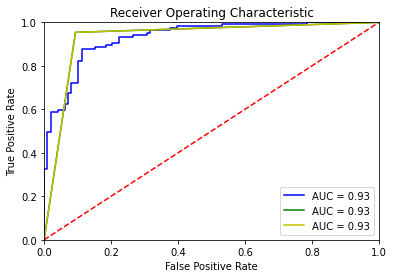

In [73]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = nb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

fpr1, tpr1, threshold1 = metrics.roc_curve(testing_data['target'], predsscr)
roc_auc1 = metrics.auc(fpr1, tpr1)

fpr2, tpr2, threshold2 = metrics.roc_curve(res, predencr)
roc_auc2 = metrics.auc(fpr2, tpr2)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, 'g', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'y', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()